# Customer Churn Pridiction



In this I analyze and making a model on a dataset comes from a telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity.

This notebook covers Retrieving data from a database, Data Manipulation, Computation, Handling Imbalanced Data and Visualization as well as Making a Machine Learning Model for predicting whether a customer will churn or not.

It uses Numpy and Pandas for data manipulation, Matplotlib and Seaborn for visualization, Scikit-Learn for making the machine learning model

In [137]:
# Import all the necessary libraries in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# import Real dataset (CSV formate)
df = pd.read_csv("/content/Telecom_data.csv")
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
# checking Shape (i.e. no. of rows and columns)
df.shape

(7043, 21)

In [140]:
# Checking Datatypes of all the columns
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [141]:
# Detailed information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [142]:
# Checking Null Values
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unfortunattly Dataset having 0 null values in all the columns

In [143]:
# Checking all the statistical factors in given dataset
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [144]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [145]:
df['TotalCharges'].dtype

dtype('O')

In [146]:
df.size

147903

In [147]:
col=['Gender','MultipleLines','InternetService','Contract','PaymentMethod']
# Remaining columns are having values like 'yes' and 'no'
for i in col:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print()

Gender
['Female' 'Male']
2

MultipleLines
['No phone service' 'No' 'Yes']
3

InternetService
['DSL' 'Fiber optic' 'No']
3

Contract
['Month-to-month' 'One year' 'Two year']
3

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4



In [148]:
df['MultipleLines']=df['MultipleLines'].replace(['No phone service'],'No')

In [149]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [150]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
df.corr()

<ipython-input-151-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,Tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
Tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<ipython-input-152-4e42b302c60a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


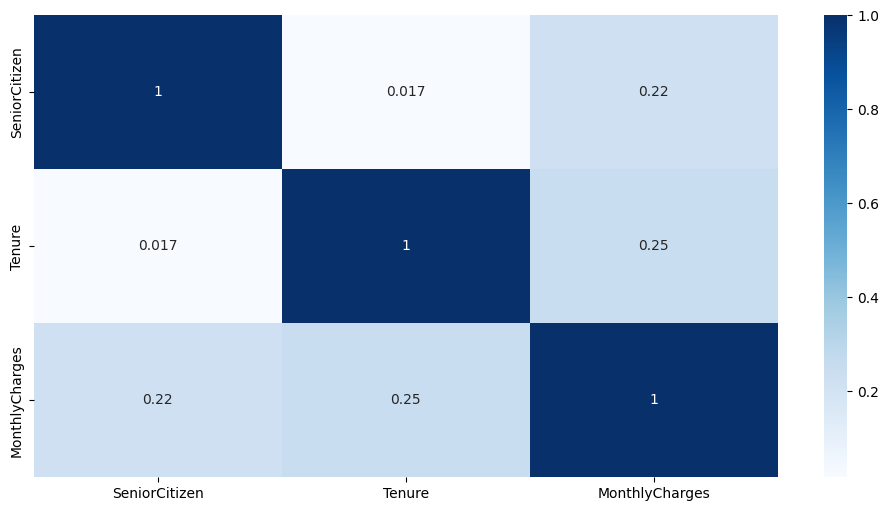

In [152]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

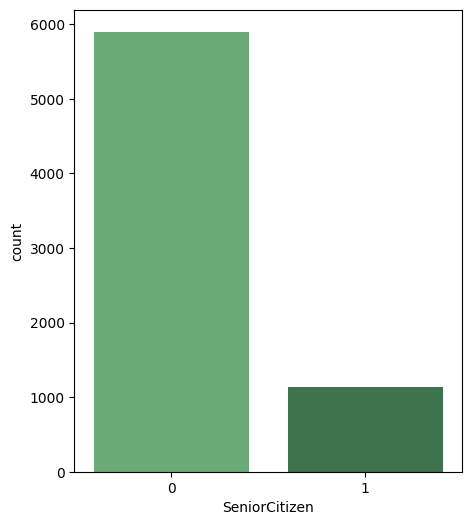

In [153]:
plt.figure(figsize=(5,6))
sns.countplot(x='SeniorCitizen',data=df,palette='Greens_d')
plt.show()

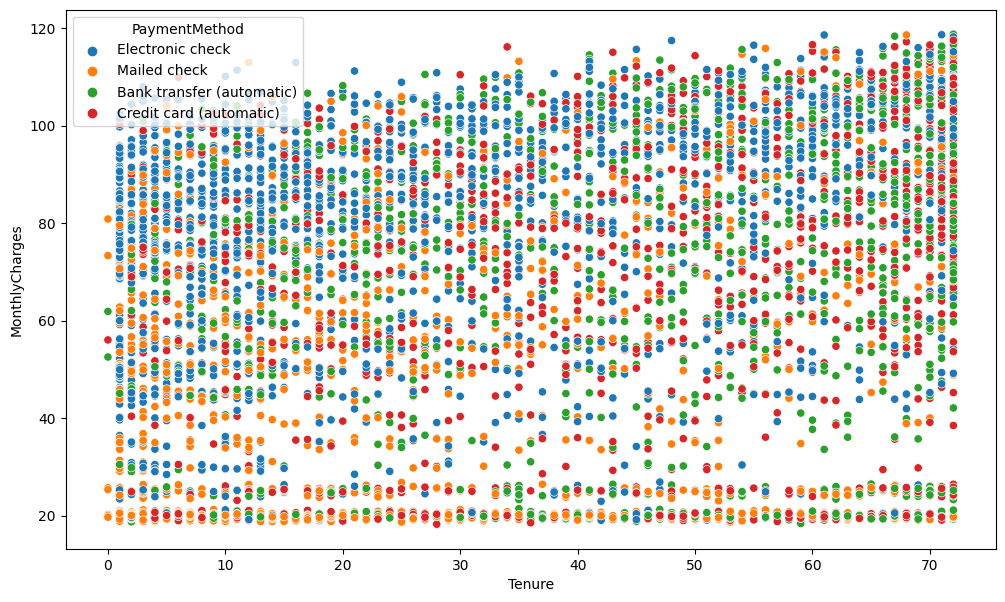

In [154]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Tenure',y='MonthlyCharges',data=df,hue='PaymentMethod')
plt.show()

In [155]:
df.drop('CustomerID', axis=1, inplace=True)

In [156]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [157]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=l.fit_transform(df[col])

In [158]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [159]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

0    73.463013
1    26.536987
Name: Churn, dtype: float64


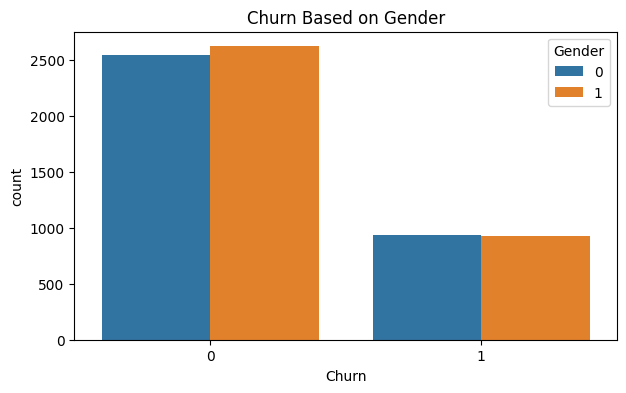

In [160]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Churn', hue='Gender', data=df)
plt.title('Churn Based on Gender')
plt.show()

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [162]:
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,1,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,0,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [163]:
X = df[['MonthlyCharges', 'Tenure']]
y = df['Churn']

In [164]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [165]:
X

,MonthlyCharges,Tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2
...,...,...
7038,84.80,24
7039,103.20,72
7040,29.60,11
7041,74.40,4


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
churn_model = LinearRegression()

In [168]:
churn_model.fit(X_train, y_train)

LinearRegression()

In [169]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [170]:
y_pred_churn = churn_model.predict(X_test)

In [171]:
y_pred_churn

array([ 0.3301451 ,  0.02843328, -0.08063191, ...,  0.18745419,
       -0.10312254,  0.35851921])

In [172]:

revenue_model = LinearRegression()

In [173]:
revenue_model.fit(X_train, y_train)

LinearRegression()

In [174]:
y_pred_revenue = revenue_model.predict(X_test)
y_pred_revenue


array([ 0.3301451 ,  0.02843328, -0.08063191, ...,  0.18745419,
       -0.10312254,  0.35851921])

In [175]:
mse = mean_squared_error(y_test, y_pred_revenue)

In [176]:
mse

0.14830580759012438

In [177]:
mean_abs_error = X_train['Tenure'].mean()


In [178]:
mean_abs_error

32.373091941782036

In [179]:
acc = 100 - mean_abs_error
acc

67.62690805821796

In [180]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_churn)

0.23807616943303878

In [181]:
churn_model.coef_

array([ 0.00433193, -0.00759153])

In [182]:
c=churn_model.intercept_
c

0.23030487410136383

In [183]:
churn_model.score(X_test,y_test)

0.23807616943303878

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [185]:
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
gnb=GaussianNB()

In [186]:
model=[dc,rf,et,knn,svm,gnb]

In [187]:
for models in model:
    models.fit(X_train,y_train)

    y_pred_churn=models.predict(X_test)


    print('Model :',models)

Model : DecisionTreeClassifier()
Model : RandomForestClassifier()
Model : ExtraTreesClassifier()
Model : KNeighborsClassifier()
Model : SVC()
Model : GaussianNB()


In [188]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [189]:
print('confusion matrix :',confusion_matrix(y_test,y_pred_churn))

confusion matrix : [[966  70]
 [214 159]]


In [190]:
print('class_report:',classification_report(y_test,y_pred_churn))
print('accuracy :',round(accuracy_score(y_test,y_pred_churn),2))
print('precision :',round(precision_score(y_test,y_pred_churn),2))
print('recall :',round(recall_score(y_test,y_pred_churn),2))
print()
R={'Model':models,
         'Accuracy':round(accuracy_score(y_test,y_pred_churn),2),
         'Recall':round(recall_score(y_test,y_pred_churn),2),
         'Precision':round(precision_score(y_test,y_pred_churn),2),
         }

class_report:               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

accuracy : 0.8
precision : 0.69
recall : 0.43

